In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ABC Temporal

In [45]:
post_sample = np.loadtxt('post.txt')
beta = post_sample[:,0]
gamma = post_sample[:,1]

In [46]:
np.mean(beta),np.mean(gamma)

(1.203651042148087, 1.020500446035389)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


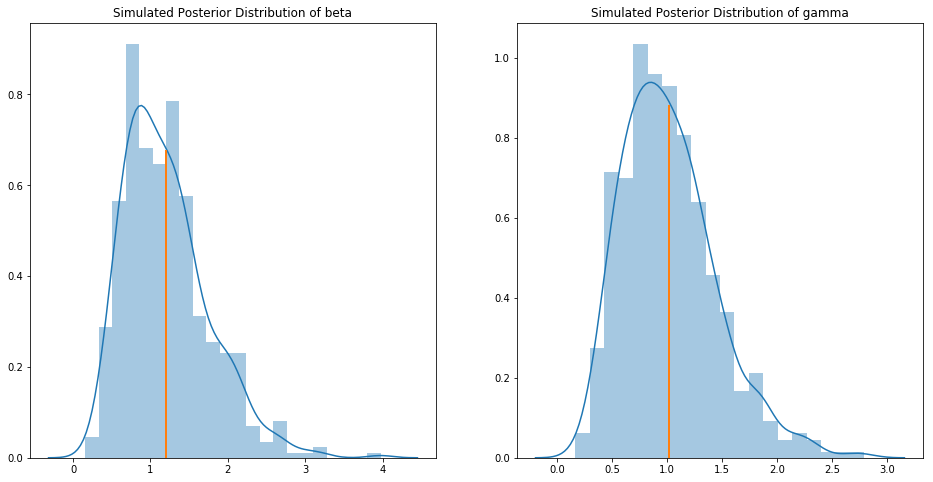

In [47]:
plt.figure(figsize=(16,8))

plt.subplot(1,2, 1)
sns.distplot(a = beta, )
plt.plot([np.mean(beta), np.mean(beta)], [0, 0.675], linewidth=2)
plt.title('Simulated Posterior Distribution of beta')

plt.subplot(1,2, 2)
sns.distplot(gamma)
plt.plot([np.mean(gamma), np.mean(gamma)], [0, 0.88], linewidth=2)
plt.title('Simulated Posterior Distribution of gamma')
pass

plt.savefig('dist.png')

# ABC-PMC Non-temporal

In [48]:
post_sample = np.loadtxt('post_pmc.txt')
beta = post_sample[:,0]
gamma = post_sample[:,1]
wei = post_sample[:,2]

In [51]:
xA = 133
N = 688

In [52]:
# Moment calculations for SMC-ABC output

weiA = sum(wei)
meanG = sum(beta*wei)/weiA
sdG = np.sqrt(sum(beta**2 * wei)/weiA-meanG**2)
meanL = sum(gamma*wei)/weiA
sdL = np.sqrt(sum(gamma**2 * wei)/weiA-meanL**2)


# Moment calculations for transformed variables

meanqG = sum(np.exp(-beta * xA/N) * wei)/weiA
sdqG = np.sqrt(sum(np.exp(-2 * beta * xA/N) * wei)/weiA-meanqG**2)
meanqL = sum(np.exp(-gamma)*wei)/weiA
sdqL = np.sqrt(sum(np.exp(-2 * gamma) * wei)/weiA - meanqL**2)


In [57]:
qG = np.exp(-beta * xA/N)

In [56]:
qL = np.exp(-gamma)

In [54]:
meanqG,sdqG

(0.8556002842920873, 0.018894362171204535)

In [55]:
meanqL,sdqL

(0.8326329846705459, 0.057245106616297635)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


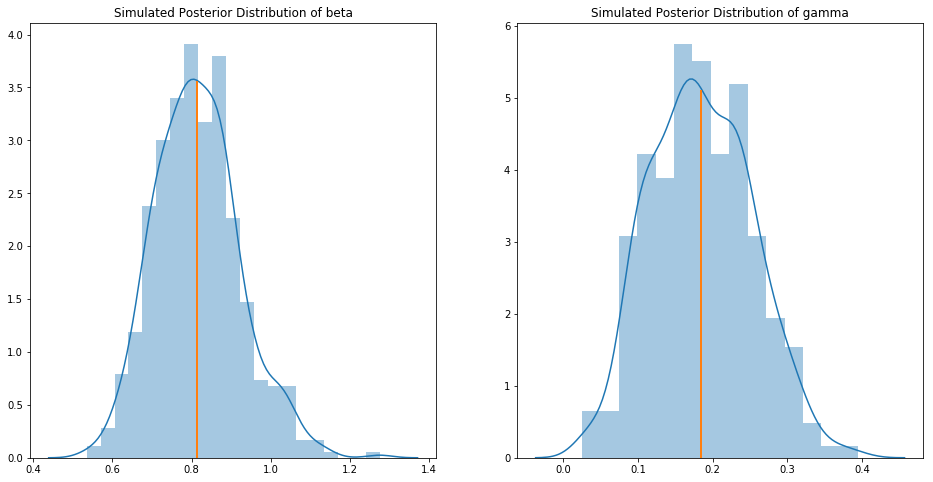

In [65]:
plt.figure(figsize=(16,8))

plt.subplot(1,2, 1)
sns.distplot(a = beta, )
plt.plot([np.mean(beta), np.mean(beta)], [0, 3.55], linewidth=2)
plt.title('Simulated Posterior Distribution of beta')

plt.subplot(1,2, 2)
sns.distplot(gamma)
plt.plot([np.mean(gamma), np.mean(gamma)], [0, 5.1], linewidth=2)
plt.title('Simulated Posterior Distribution of gamma')
pass


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


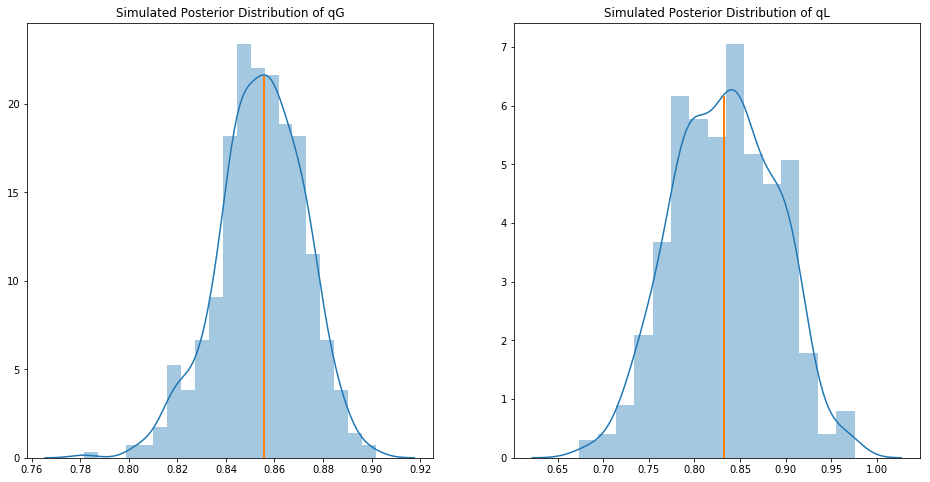

In [75]:
plt.figure(figsize=(16,8))

plt.subplot(1,2, 1)
sns.distplot(a = qG, )
plt.plot([meanqG, meanqG], [0, 21.5], linewidth=2)
plt.title('Simulated Posterior Distribution of qG')

plt.subplot(1,2, 2)
sns.distplot(qL)
plt.plot([meanqL, meanqL], [0, 6.15], linewidth=2)
plt.title('Simulated Posterior Distribution of qL')
pass

plt.savefig('dist.png')